In [1]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Javascript

import pytorch_drl.models.actor_critic_models as models
from notebook_utils import plot, mean_filter
from pytorch_drl.algs.a2c import A2C

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda:0


## Create environment

In [4]:
env_name = "CartPole-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.n

print("State size:", state_size, "\nAction size:", action_size)

State size: 4 
Action size: 2


/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## A2C Test

../torch/csrc/utils/python_arg_parser.cpp:698: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, Number alpha)


Avg score: 195.02 i: 735                       Solved! Episode 735


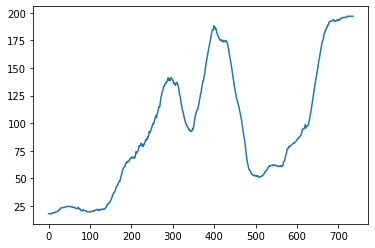

Process Process-3:
Process Process-16:
Process Process-9:
Process Process-15:
Process Process-11:
Process Process-14:
Process Process-8:
Traceback (most recent call last):
Process Process-1:
Traceback (most recent call last):
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-12:
Traceback (most recent call last):
Process Process-2:
Process Process-4:
Process Process-5:
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Process Process-7:
Traceback (most recent call last):
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/selo/anaconda3/envs/ml-agents/li

  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "../pytorch_drl/utils/parallel_env.py", line 124, in worker
    cmd, data = remote.recv()
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/home/selo/anaconda3/envs/ml-agents/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/home/selo/anaconda3/envs/ml-agents

In [6]:
env_name = "CartPole-v0"
env = gym.make(env_name)
env.seed(0)
state_size =  env.observation_space.shape[0]
action_size = env.action_space.n

tmax = 5
n_episodes = (20_000)//tmax
n_env = 16
a2c_model = models.ActorCriticMLP(state_size, action_size, env.action_space, H=256)
# init agent:
agent = A2C(a2c_model,
            env_name,
            n_env=n_env,
            use_gae=False
            )

max_score = 195.
model_name = "a2c_{}".format(env_name)
# train the agent
scores, losses = agent.train(tmax, n_episodes,  env, max_score, model_name)

# plot the training:
x = np.arange(len(scores))
scores = mean_filter(scores, 50)
plt.plot(x, scores, label = "scores")
plt.show()
env.close()

### Trained Agent Demonstration

In [ ]:
agent.test(env, render=True, n_episodes=4)

## A2C Continuous Test


In [ ]:
env_name = "Pendulum-v0"
env = gym.make(env_name)
env.seed(0)
state_size =  env.observation_space.shape[0]
action_size = env.action_space.shape[0]

tmax = 5
n_episodes = 1000
n_env = 16
a2c_model = models.ActorCriticMLP(state_size, action_size, env.action_space, H=64)
lr = 1e-3
# init agent:
agent = A2C(a2c_model,
            env_name,
            n_env=n_env,
            lr=lr,
            critic_coef=0.1,
            )

max_score = -20.
model_name = "a2c_{}".format(env_name)
# train the agent
scores, losses = agent.train(tmax, n_episodes,  env, max_score, model_name, det_test=True)

# plot the training:
x = np.arange(len(scores))
scores = mean_filter(scores, 50)
plt.plot(x, scores, label = "scores")
plt.show()
env.close()

### Trained Agent Demonstration

In [ ]:
agent.test(env, render=True, n_episodes=4)